In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings_df = pd.read_csv('ml-25m/ratings.csv')
movies_df = pd.read_csv('ml-25m/movies.csv')

In [3]:
rating_counts = ratings_df['rating'].value_counts()
active_users = ratings_df['userId'].value_counts().head(10)

评分分布可视化：

创建一个条形图来显示不同评分的频率。

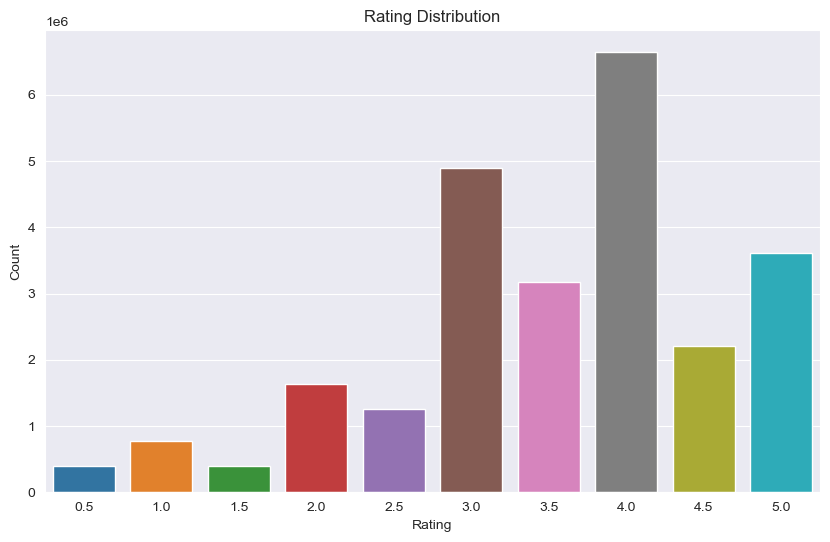

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

最活跃用户可视化：

创建一个条形图来展示评分次数最多的用户。

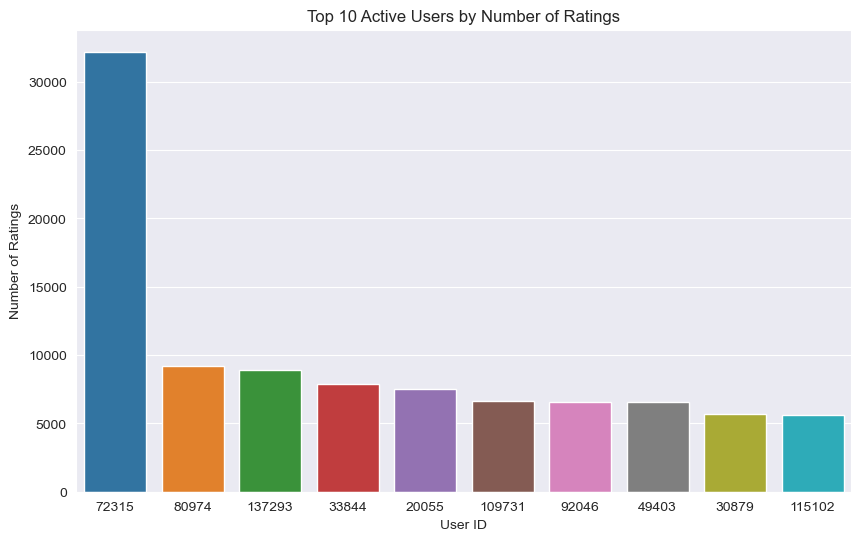

In [5]:
# 创建条形图，按照评分次数排序
plt.figure(figsize=(10, 6))
sns.barplot(x=active_users.index, y=active_users.values, order=active_users.index)
plt.title('Top 10 Active Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

用户评分习惯分析
分析用户给出的评分分布，了解不同用户的评分习惯是否有显著差异。

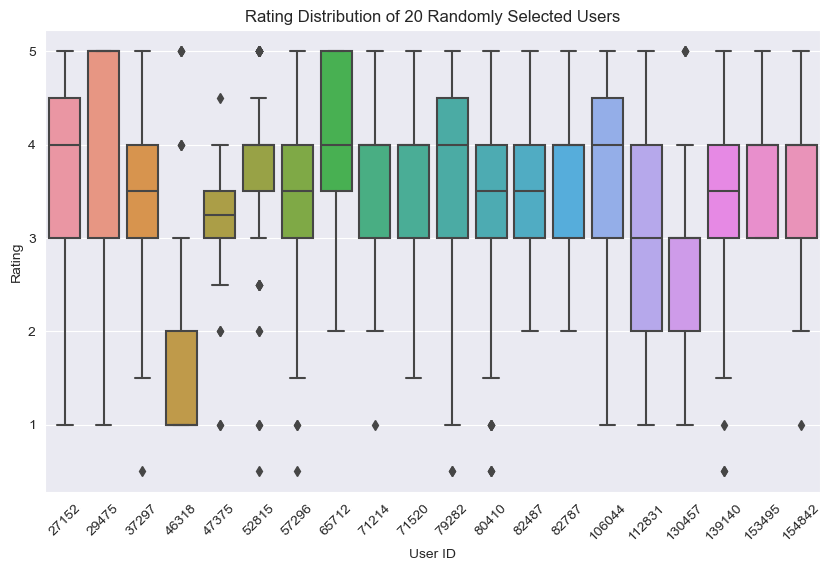

In [6]:
# 随机选择20名用户
sample_users = np.random.choice(ratings_df['userId'].unique(), 20, replace=False)

# 获取这些用户的评分数据
sample_ratings = ratings_df[ratings_df['userId'].isin(sample_users)]

# 创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='userId', y='rating', data=sample_ratings)
plt.title('Rating Distribution of 20 Randomly Selected Users')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


电影流行度分析：

分析哪些电影收到的评分次数最多，这可以作为电影流行度的一个指标。

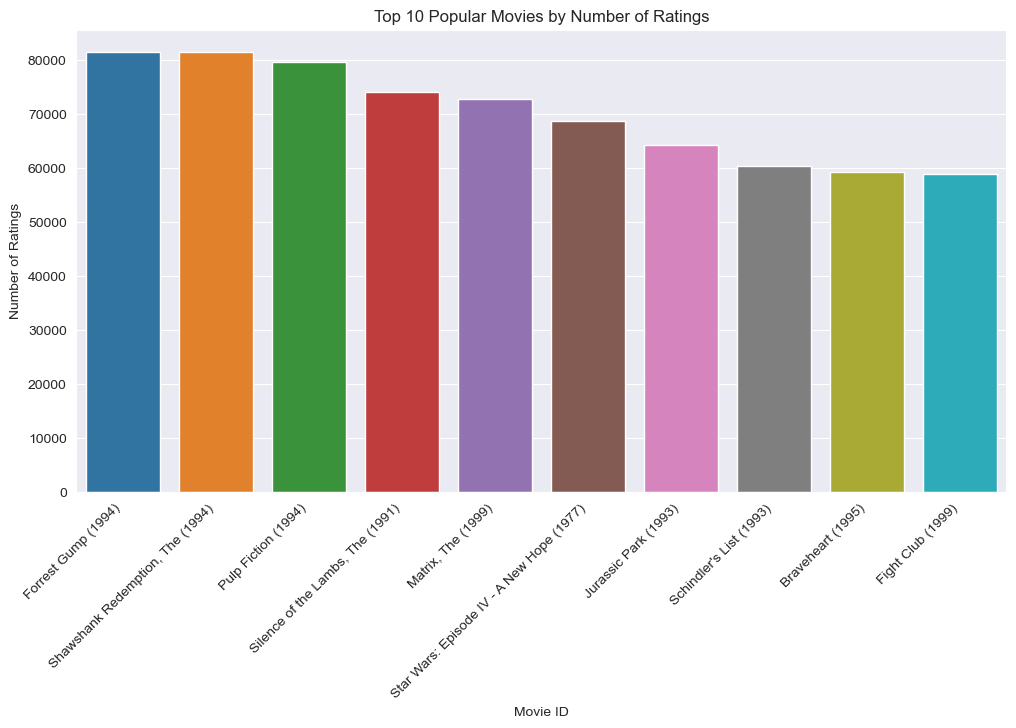

In [7]:
# 计算每部电影的评分次数
movie_popularity = ratings_df['movieId'].value_counts().head(10)

# 将横坐标的电影ID转换为电影名称
movie_popularity.index = movie_popularity.index.map(movies_df.set_index('movieId')['title'])

# 绘制电影流行度条形图
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_popularity.index, y=movie_popularity.values, order=movie_popularity.index)
plt.title('Top 10 Popular Movies by Number of Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
movie_ratings_df = ratings_df.merge(movies_df, on='movieId')
# drop title and timestamp
movie_ratings_df = movie_ratings_df.drop(['title', 'timestamp'], axis=1)
# 使用 get_dummies 函数将 'genres' 列转换为虚拟列
dummies = movie_ratings_df['genres'].str.get_dummies(sep='|')

# 将虚拟列合并到原始 DataFrame 中
df_combined = movie_ratings_df.join(dummies)

# 从 DataFrame 中删除 'genres' 列
df_combined = df_combined.drop('genres', axis=1)
# 计算每种电影类别的数量
genre_counts = df_combined.iloc[:, 3:].sum()

电影类别分析：
分析每种电影类别的数量。

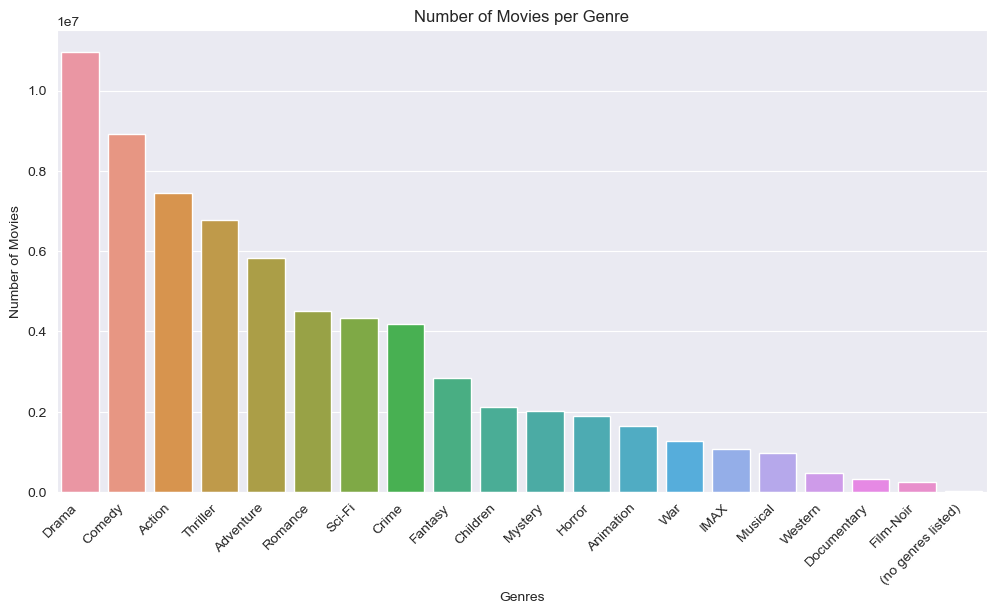

In [9]:
# 绘制每种电影类别的数量
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, order=genre_counts.sort_values(ascending=False).index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Movies per Genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genres')
plt.show()

电影类别评分分析：
分析每种电影类别的平均评分。

In [10]:
# 将数据转换为每行一个类别评分的格式
melted_df = pd.melt(df_combined, id_vars=['rating'], value_vars=list(df_combined.columns[3:]),
                    var_name='Genre', value_name='Present')
melted_df = melted_df[melted_df['Present'] == 1]

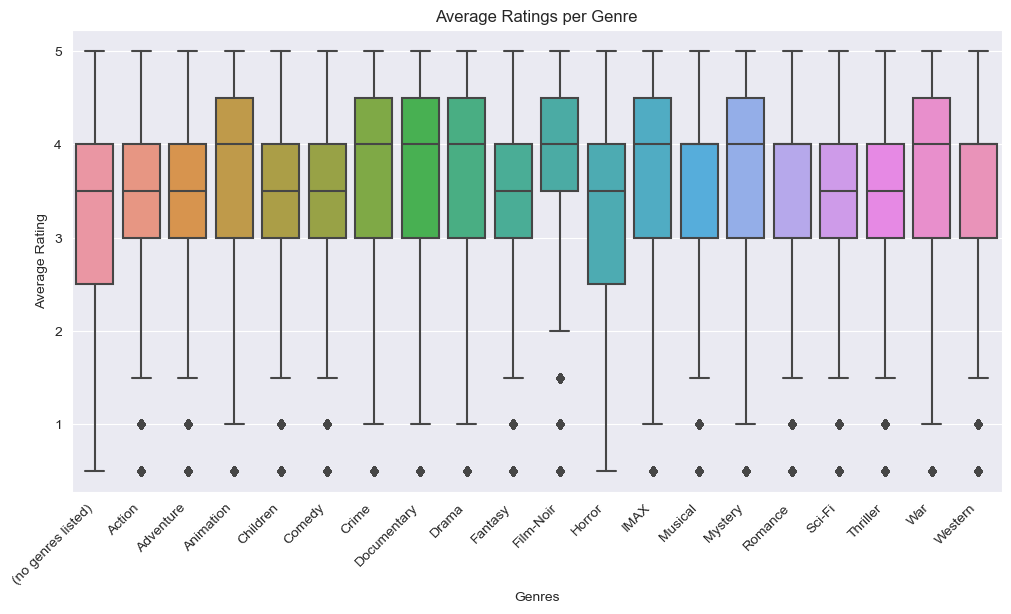

In [11]:
# 绘制每种电影类别的平均评分
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='rating', data=melted_df)
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings per Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genres')
plt.show()